## Other Dimension Reduction Methods

#### By: Kuan-Lin Chen
#### Last edited: 2021/09/01
---

In this notebook, we will be learning some other **Dimension Reduction Methods** other than PCA.

1. **LLE** - Locally Linear Embedding
2. **Isomap** - Isometric Mapping
3. **MDS** - MultiDimensional Scaling
4. **t-DSE** - t-Distributed Stochastic Neighbor Embedding

Using these method to unroll the Swiss Roll Data!

In [1]:
# import packages
import copy
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# plotting set-up
plt.rc('font', family = 'serif', size = 13, weight = "bold")
# My Set-Up
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
# Sam's Set-Up
# plt.rc('xtick', labelsize = 10, direction = 'in', top = 'on')
# plt.rc('xtick.major', size = 5, width = 2)
# plt.rc('ytick', labelsize = 10, direction = 'in', right = 'on')
# plt.rc('ytick.major', size = 5, width = 2)
plt.rc('axes', linewidth = 2)
plt.rc('lines', linewidth = 3)
plt.rc('figure', figsize = (6, 6))
plt.rc('legend', fontsize = 13)

cm = plt.cm.get_cmap('tab20')

We will start with **generating some 3d Swiss Roll dataset.** And try other different dimension reduction algorithms, **projecting the n-dimensional manifold onto a lower dimension space, while preserving the geometric features.**

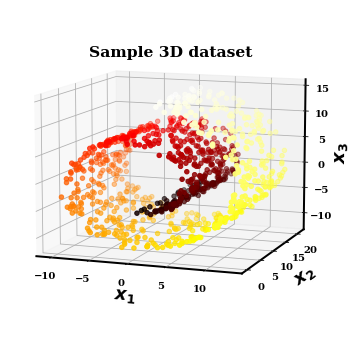

In [9]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 89)

fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)

plt.title("Sample 3D dataset", weight = "bold", y=.9)

plt.show()

## LLE
### Locally Linear Embedding

LLE measures how each training instance linearly relates to its closest neighbors (can set how many neighbor in ```n_neighbors``` (default: 5)), then look for a low-dimension representation (set in ```n_components```) presrving the "local neighbor-ship"

In [10]:
from sklearn.manifold import LocallyLinearEmbedding

In [11]:
help(LocallyLinearEmbedding)

Help on class LocallyLinearEmbedding in module sklearn.manifold._locally_linear:

class LocallyLinearEmbedding(sklearn.base.TransformerMixin, sklearn.base._UnstableArchMixin, sklearn.base.BaseEstimator)
 |  LocallyLinearEmbedding(*, n_neighbors=5, n_components=2, reg=0.001, eigen_solver='auto', tol=1e-06, max_iter=100, method='standard', hessian_tol=0.0001, modified_tol=1e-12, neighbors_algorithm='auto', random_state=None, n_jobs=None)
 |  
 |  Locally Linear Embedding
 |  
 |  Read more in the :ref:`User Guide <locally_linear_embedding>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : integer
 |      number of neighbors to consider for each point.
 |  
 |  n_components : integer
 |      number of coordinates for the manifold
 |  
 |  reg : float
 |      regularization constant, multiplies the trace of the local covariance
 |      matrix of the distances.
 |  
 |  eigen_solver : string, {'auto', 'arpack', 'dense'}
 |      auto : algorithm will attempt to choose the best method fo

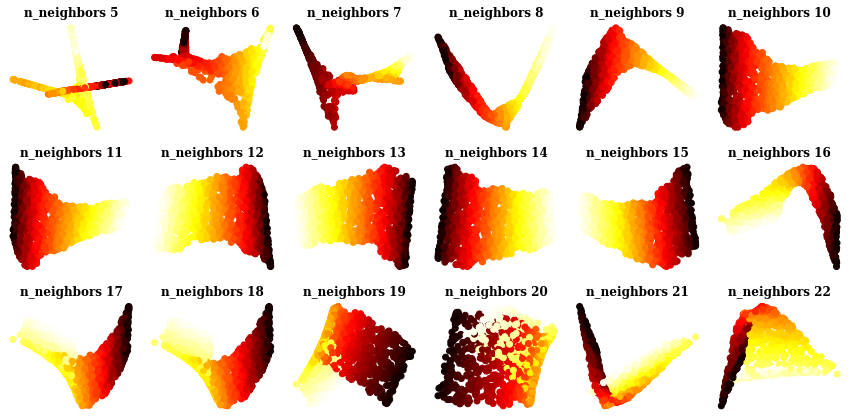

In [28]:
fig = plt.figure(figsize = (12, 6))

for i in range(18):
    
    lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 5 + i)
    X_reduced = lle.fit_transform(X)
    
    plt.subplot(3, 6, i + 1)

    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)
    
    plt.title("n_neighbors {:d}".format(5+i), weight = "bold", fontsize = 12)
    plt.axis(False)
        
plt.tight_layout();plt.show()

Seems that ```n_neighbors``` at 12 - 14 works best at unrolling the swiss roll

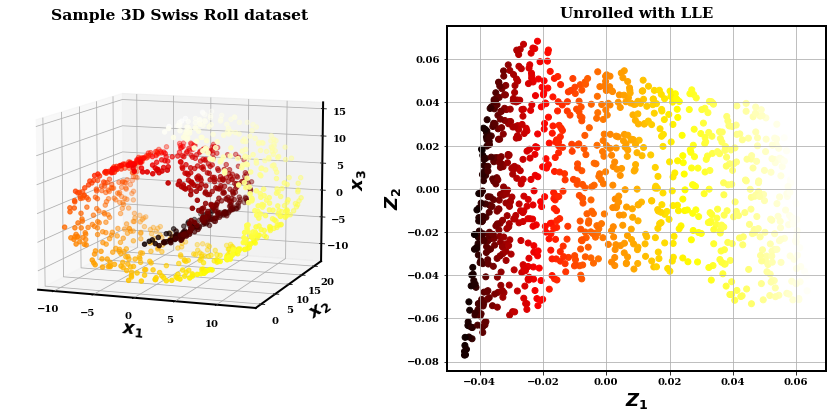

In [31]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection = '3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)

plt.title("Sample 3D Swiss Roll dataset", weight = "bold")

ax = plt.subplot(1, 2, 2)

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 12)
X_reduced = lle.fit_transform(X)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)

ax.set_title("Unrolled with LLE", fontsize = 15, y = 1.005, weight = "bold")
ax.set_xlabel("$Z_1$", fontsize=18)
ax.set_ylabel("$Z_2$", fontsize=18)
ax.grid(True)

plt.tight_layout()

## Isomap
#### Isometric Mapping

Isomap works similar to LLE, aiming to **preserve the geodesic distance between samples.**

In [38]:
from sklearn.manifold import Isomap

In [39]:
help(Isomap)

Help on class Isomap in module sklearn.manifold._isomap:

class Isomap(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Isomap(*, n_neighbors=5, n_components=2, eigen_solver='auto', tol=0, max_iter=None, path_method='auto', neighbors_algorithm='auto', n_jobs=None, metric='minkowski', p=2, metric_params=None)
 |  
 |  Isomap Embedding
 |  
 |  Non-linear dimensionality reduction through Isometric Mapping
 |  
 |  Read more in the :ref:`User Guide <isomap>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : integer
 |      number of neighbors to consider for each point.
 |  
 |  n_components : integer
 |      number of coordinates for the manifold
 |  
 |  eigen_solver : ['auto'|'arpack'|'dense']
 |      'auto' : Attempt to choose the most efficient solver
 |      for the given problem.
 |  
 |      'arpack' : Use Arnoldi decomposition to find the eigenvalues
 |      and eigenvectors.
 |  
 |      'dense' : Use a direct solver (i.e. LAPACK)
 |      for the eigenvalue dec

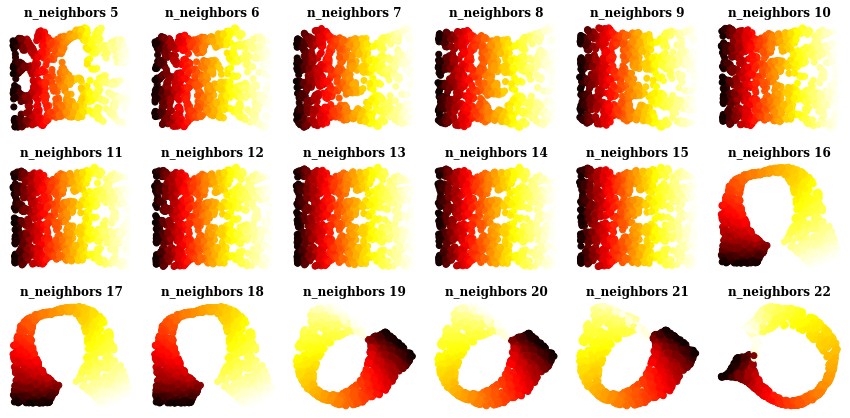

In [40]:
fig = plt.figure(figsize = (12, 6))

for i in range(18):
    
    ismp = Isomap(n_components = 2, n_neighbors = 5 + i)
    X_reduced = ismp.fit_transform(X)
    
    plt.subplot(3, 6, i + 1)

    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)
    
    plt.title("n_neighbors {:d}".format(5+i), weight = "bold", fontsize = 12)
    plt.axis(False)
        
plt.tight_layout();plt.show()

Seems that ```n_neighbors``` at 6 - 15 works best at unrolling the swiss roll

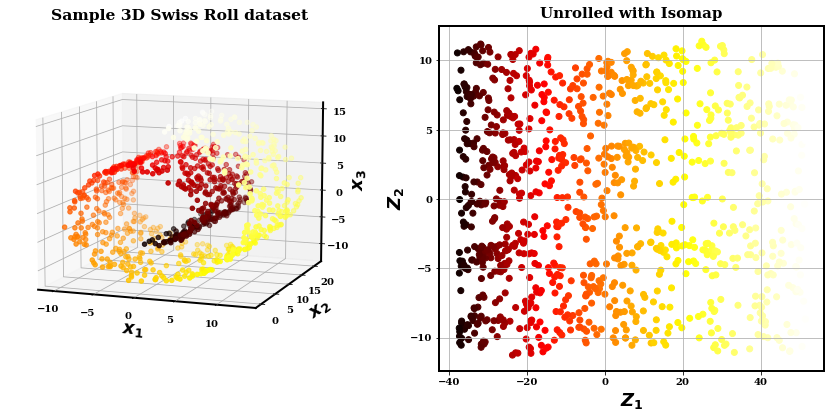

In [41]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection = '3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)

plt.title("Sample 3D Swiss Roll dataset", weight = "bold")

ax = plt.subplot(1, 2, 2)

ismp = Isomap(n_components = 2, n_neighbors = 15)
X_reduced = ismp.fit_transform(X)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)

ax.set_title("Unrolled with Isomap", fontsize = 15, y = 1.005, weight = "bold")
ax.set_xlabel("$Z_1$", fontsize=18)
ax.set_ylabel("$Z_2$", fontsize=18)
ax.grid(True)

plt.tight_layout()

## MDS
### Multidimensional Scaling

MDS also reduces dimensionality while trying to preserve the distances between samples. It works very similar to PCA, but instead of *converting the correlations (PCA) into a 2d graph*, it **converts the distance among samples into a 2d graph**. MDS then minimizes the linear distances as PCA minimizes the linear correlation.

Good Intro: https://www.youtube.com/watch?v=GEn-_dAyYME

In [32]:
from sklearn.manifold import MDS

In [33]:
help(MDS)

Help on class MDS in module sklearn.manifold._mds:

class MDS(sklearn.base.BaseEstimator)
 |  MDS(n_components=2, *, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=None, random_state=None, dissimilarity='euclidean')
 |  
 |  Multidimensional scaling
 |  
 |  Read more in the :ref:`User Guide <multidimensional_scaling>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, optional, default: 2
 |      Number of dimensions in which to immerse the dissimilarities.
 |  
 |  metric : boolean, optional, default: True
 |      If ``True``, perform metric MDS; otherwise, perform nonmetric MDS.
 |  
 |  n_init : int, optional, default: 4
 |      Number of times the SMACOF algorithm will be run with different
 |      initializations. The final results will be the best output of the runs,
 |      determined by the run with the smallest final stress.
 |  
 |  max_iter : int, optional, default: 300
 |      Maximum number of iterations of the SMACOF algorithm for a single run

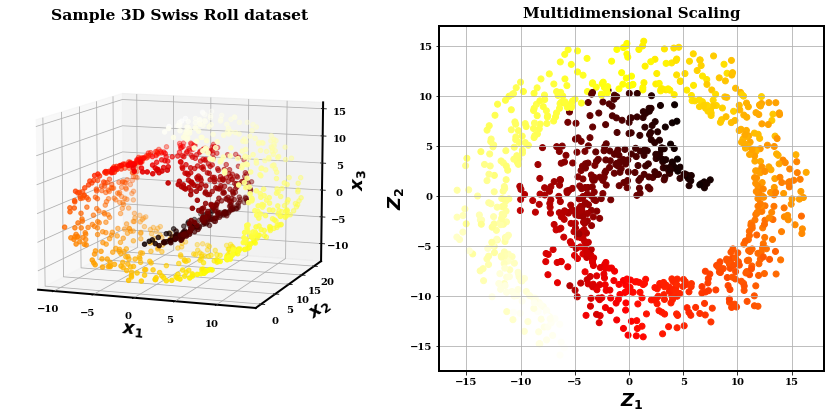

In [37]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection = '3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)

plt.title("Sample 3D Swiss Roll dataset", weight = "bold")

ax = plt.subplot(1, 2, 2)

mds = MDS(n_components = 2, n_init = 10)
X_reduced = mds.fit_transform(X)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)

ax.set_title("Multidimensional Scaling", fontsize = 15, y = 1.005, weight = "bold")
ax.set_xlabel("$Z_1$", fontsize=18)
ax.set_ylabel("$Z_2$", fontsize=18)
ax.grid(True)

plt.tight_layout()

MDS does not work well on unrolling the Swiss Roll data, but it's still fine, and may work well on other data. Note that there is NO algorithms works well on ALL data. We should always try it out to know whether this reduction method is good for our data or not!

## t-SNE
### t-Distributed Stochastic Neighbor Embedding

t-SNE projects high dimension data to a low dimension space while **preserving the original clusters**

Good Intro: https://www.youtube.com/watch?v=NEaUSP4YerM

In [42]:
from sklearn.manifold import TSNE

In [43]:
help(TSNE)

Help on class TSNE in module sklearn.manifold._t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  TSNE(n_components=2, *, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=None)
 |  
 |  t-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  to reduce the number of di

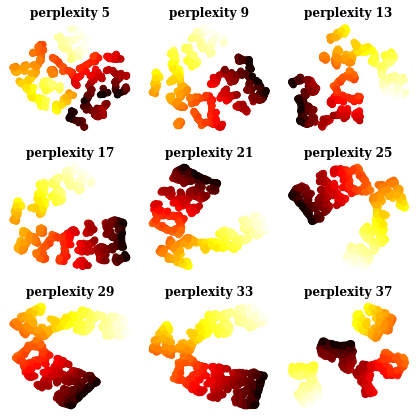

In [45]:
fig = plt.figure(figsize = (6, 6))

for i in range(9):
    
    tsne = TSNE(n_components = 2, perplexity = float(5 + 4*i))
    X_reduced = tsne.fit_transform(X)
    
    plt.subplot(3, 3, i + 1)

    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)
    
    plt.title("perplexity {:d}".format(5 + 4*i), weight = "bold", fontsize = 12)
    plt.axis(False)
        
plt.tight_layout();plt.show()

Note that as t-SNE is good for preserving cluster, and our Swiss Roll dataset does not have evident clusters, t-SNE does not unroll the data well. Still, it's interesting to see the results.

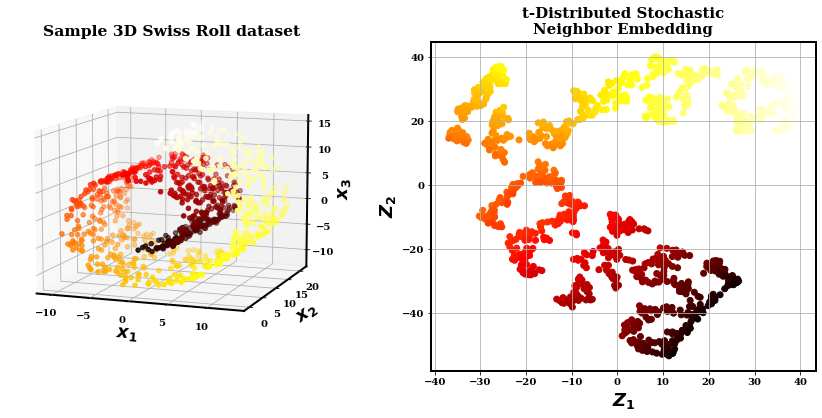

In [47]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection = '3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)

plt.title("Sample 3D Swiss Roll dataset", weight = "bold")

ax = plt.subplot(1, 2, 2)

tsne = TSNE(n_components = 2, perplexity = 25.0)
X_reduced = tsne.fit_transform(X)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)

ax.set_title("t-Distributed Stochastic\nNeighbor Embedding", fontsize = 15, y = 1.005, weight = "bold")
ax.set_xlabel("$Z_1$", fontsize=18)
ax.set_ylabel("$Z_2$", fontsize=18)
ax.grid(True)

plt.tight_layout()

References:
   - Hands-On Machine Learning with Scikit-Learn and TensorFlow, Chap.8: Dimensionality Reduction (https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/)